In [70]:
import pandas as pd 
import numpy as np

#### Load the dataset 

In [72]:
file_name = 'malayalam_youtube_tech_data_final.csv'
df = pd.read_csv(file_name)

print(f"\nSuccessfully loaded '{file_name}'")
print(f"Your dataset has {len(df)} rows and {len(df.columns)} columns.")


Successfully loaded 'malayalam_youtube_tech_data_final.csv'
Your dataset has 16806 rows and 6 columns.


In [73]:
print(df.head())

                                         video_title  view_count  like_count  \
0  Giant Chakra | Diwali Special | ഈ ചക്രം കറങ്ങു...      267981       11664   
1  Giant Flower Pot | Diwali Special | ആന മേശപ്പൂ...      318282       14182   
2  ഞങ്ങൾക്ക് ഒരു മകൾ ജനിച്ചു | Our First Baby | M...     1125747       28505   
3  Robo War | Red Vs Blue | Who Will Be The Winne...      582108       13896   
4  Giant Avoli Fish Grill | ആവോലിമീനെ ചുട്ടത് | M...      917272       24545   

   comment_count channel_name  subscriber_count  
0            305      M4 Tech          13700000  
1            271      M4 Tech          13700000  
2           1274      M4 Tech          13700000  
3            341      M4 Tech          13700000  
4            551      M4 Tech          13700000  


#### Inspect Data

In [75]:
df.shape

(16806, 6)

In [76]:
df.columns

Index(['video_title', 'view_count', 'like_count', 'comment_count',
       'channel_name', 'subscriber_count'],
      dtype='object')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16806 entries, 0 to 16805
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   video_title       16806 non-null  object
 1   view_count        16806 non-null  int64 
 2   like_count        16806 non-null  int64 
 3   comment_count     16806 non-null  int64 
 4   channel_name      16806 non-null  object
 5   subscriber_count  16806 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 787.9+ KB


#### Handle Missing Values 

In [79]:
missing_values = df.isnull().sum()
print(missing_values)

video_title         0
view_count          0
like_count          0
comment_count       0
channel_name        0
subscriber_count    0
dtype: int64


##### Check for Duplicates

In [81]:
duplicate_rows = df.duplicated().sum()
print(f"Found {duplicate_rows} duplicate rows.")

if duplicate_rows > 0:

    df = df.drop_duplicates()
    print(f"Removed {duplicate_rows} duplicates. Your dataset now has {len(df)} rows.")
else:
    print("Result: No duplicate rows found. Your data is unique.")

Found 0 duplicate rows.
Result: No duplicate rows found. Your data is unique.


#### Get Descriptive Statistics

In [83]:
print(df.describe())

         view_count    like_count  comment_count  subscriber_count
count  1.680600e+04  1.680600e+04   16806.000000      1.680600e+04
mean   4.968143e+05  2.287032e+04     444.499107      1.826776e+06
std    5.889492e+06  1.342751e+05    1136.138859      2.556994e+06
min    0.000000e+00  0.000000e+00       0.000000      3.250000e+03
25%    2.495475e+04  1.171000e+03      56.000000      1.020000e+06
50%    6.673950e+04  3.628500e+03     183.000000      1.270000e+06
75%    1.956605e+05  1.145325e+04     457.000000      1.820000e+06
max    4.190372e+08  9.036811e+06   45356.000000      1.370000e+07


#### Feature Engineering

In [85]:
# 1. Create Like-to-View Ratio (Approval Score)
df['like_ratio'] = df['like_count'] / (df['view_count'] + 1)

# 2. Create Comment-to-View Ratio (Engagement Score)
df['comment_ratio'] = df['comment_count'] / (df['view_count'] + 1)

# 3. Create Like-to-Comment Ratio (Discussion Score)
df['discussion_ratio'] = df['like_count'] / (df['comment_count'] + 1)

print("Successfully created 3 new feature columns!")

# Let's look at the data again with the new columns
print("\n--- Data Head (with new 'ratio' columns) ---")
print(df.head())

Successfully created 3 new feature columns!

--- Data Head (with new 'ratio' columns) ---
                                         video_title  view_count  like_count  \
0  Giant Chakra | Diwali Special | ഈ ചക്രം കറങ്ങു...      267981       11664   
1  Giant Flower Pot | Diwali Special | ആന മേശപ്പൂ...      318282       14182   
2  ഞങ്ങൾക്ക് ഒരു മകൾ ജനിച്ചു | Our First Baby | M...     1125747       28505   
3  Robo War | Red Vs Blue | Who Will Be The Winne...      582108       13896   
4  Giant Avoli Fish Grill | ആവോലിമീനെ ചുട്ടത് | M...      917272       24545   

   comment_count channel_name  subscriber_count  like_ratio  comment_ratio  \
0            305      M4 Tech          13700000    0.043525       0.001138   
1            271      M4 Tech          13700000    0.044558       0.000851   
2           1274      M4 Tech          13700000    0.025321       0.001132   
3            341      M4 Tech          13700000    0.023872       0.000586   
4            551      M4 Tech          

In [86]:
print(df.head())

                                         video_title  view_count  like_count  \
0  Giant Chakra | Diwali Special | ഈ ചക്രം കറങ്ങു...      267981       11664   
1  Giant Flower Pot | Diwali Special | ആന മേശപ്പൂ...      318282       14182   
2  ഞങ്ങൾക്ക് ഒരു മകൾ ജനിച്ചു | Our First Baby | M...     1125747       28505   
3  Robo War | Red Vs Blue | Who Will Be The Winne...      582108       13896   
4  Giant Avoli Fish Grill | ആവോലിമീനെ ചുട്ടത് | M...      917272       24545   

   comment_count channel_name  subscriber_count  like_ratio  comment_ratio  \
0            305      M4 Tech          13700000    0.043525       0.001138   
1            271      M4 Tech          13700000    0.044558       0.000851   
2           1274      M4 Tech          13700000    0.025321       0.001132   
3            341      M4 Tech          13700000    0.023872       0.000586   
4            551      M4 Tech          13700000    0.026759       0.000601   

   discussion_ratio  
0         38.117647  
1     

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16806 entries, 0 to 16805
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   video_title       16806 non-null  object 
 1   view_count        16806 non-null  int64  
 2   like_count        16806 non-null  int64  
 3   comment_count     16806 non-null  int64  
 4   channel_name      16806 non-null  object 
 5   subscriber_count  16806 non-null  int64  
 6   like_ratio        16806 non-null  float64
 7   comment_ratio     16806 non-null  float64
 8   discussion_ratio  16806 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.2+ MB


### Feature Engineering (Create Engagement Rate)

In [89]:
df['official_engagement_rate'] = (df['like_count'] + df['comment_count']) / (df['subscriber_count'] + 1)

print("Successfully created the 'official_engagement_rate' column!")

df.head()

Successfully created the 'official_engagement_rate' column!


,video_title,view_count,like_count,comment_count,channel_name,subscriber_count,like_ratio,comment_ratio,discussion_ratio,official_engagement_rate
0,Giant Chakra | Diwali Special | ഈ ചക്രം കറങ്ങു...,267981,11664,305,M4 Tech,13700000,0.043525,0.001138,38.117647,0.000874
1,Giant Flower Pot | Diwali Special | ആന മേശപ്പൂ...,318282,14182,271,M4 Tech,13700000,0.044558,0.000851,52.139706,0.001055
2,ഞങ്ങൾക്ക് ഒരു മകൾ ജനിച്ചു | Our First Baby | M...,1125747,28505,1274,M4 Tech,13700000,0.025321,0.001132,22.356863,0.002174
3,Robo War | Red Vs Blue | Who Will Be The Winne...,582108,13896,341,M4 Tech,13700000,0.023872,0.000586,40.631579,0.001039
4,Giant Avoli Fish Grill | ആവോലിമീനെ ചുട്ടത് | M...,917272,24545,551,M4 Tech,13700000,0.026759,0.000601,44.465580,0.001832


In [90]:
#Post_Frequency

channel_join_year = {
    'M4 Tech': 2017,
    'CallMeShazzam': 2020,
    'Ratheesh R Menon': 2012,
    'Jayaraj G Nath': 2011,
    'GADGETS ONE MALAYALAM TECH TIPS': 2017,
    'Mr. Perfect Tech': 2020,
    'Rickyrodger': 2015,
    'Sarath\'S Neon Tech': 2019,
    'ADOPIX': 2017,
    'PrathapGTech': 2018,
    'Malayalam Tech - മലയാളം ടെക്': 2016,
    'Tec Tok by Hareesh': 2019,
    'Mallu Discovery TV': 2013,
    'Mallu Tech': 2025,
    'MalayaliPada - Vlogs & Tech Reviews from USA': 2019,
    'Tech Frame Malayalam': 2018,
    'Tech 4 Malayalam': 2017
}

print("1. Loaded your 17 manually collected join years.")

1. Loaded your 17 manually collected join years.


In [91]:
#Calculate 'total_posts' and 'account_age'
# We are in 2025, so we subtract the join year
current_year = 2025
total_posts_per_channel = df['channel_name'].value_counts()
account_age_years = {channel: (current_year - year) + 1 for channel, year in channel_join_year.items()}

In [92]:
#Map these new values back to our main DataFrame
df['total_posts'] = df['channel_name'].map(total_posts_per_channel)
df['account_age_years'] = df['channel_name'].map(account_age_years)

#Create the final 'post_frequency' column
df['post_frequency_per_year'] = df['total_posts'] / df['account_age_years']
print("2. Successfully created 'total_posts', 'account_age_years', and 'post_frequency_per_year' columns!")

2. Successfully created 'total_posts', 'account_age_years', and 'post_frequency_per_year' columns!


In [93]:
df.head()

,video_title,view_count,like_count,comment_count,channel_name,subscriber_count,like_ratio,comment_ratio,discussion_ratio,official_engagement_rate,total_posts,account_age_years,post_frequency_per_year
0,Giant Chakra | Diwali Special | ഈ ചക്രം കറങ്ങു...,267981,11664,305,M4 Tech,13700000,0.043525,0.001138,38.117647,0.000874,699,9.0,77.666667
1,Giant Flower Pot | Diwali Special | ആന മേശപ്പൂ...,318282,14182,271,M4 Tech,13700000,0.044558,0.000851,52.139706,0.001055,699,9.0,77.666667
2,ഞങ്ങൾക്ക് ഒരു മകൾ ജനിച്ചു | Our First Baby | M...,1125747,28505,1274,M4 Tech,13700000,0.025321,0.001132,22.356863,0.002174,699,9.0,77.666667
3,Robo War | Red Vs Blue | Who Will Be The Winne...,582108,13896,341,M4 Tech,13700000,0.023872,0.000586,40.631579,0.001039,699,9.0,77.666667
4,Giant Avoli Fish Grill | ആവോലിമീനെ ചുട്ടത് | M...,917272,24545,551,M4 Tech,13700000,0.026759,0.000601,44.465580,0.001832,699,9.0,77.666667


In [94]:
#Remove extra and unused columns 

print(f"Original columns: {df.columns.tolist()}")

columns_to_drop = []

# 1. Remove the text column we can't use
if 'video_title' in df.columns:
    columns_to_drop.append('video_title')

# 2. Check for and remove the old "extra" columns
if 'like_ratio' in df.columns:
    columns_to_drop.append('like_ratio')
if 'comment_ratio' in df.columns:
    columns_to_drop.append('comment_ratio')
if 'discussion_ratio' in df.columns:
    columns_to_drop.append('discussion_ratio')

# Drop all the columns we don't need
df_processed = df.drop(columns=columns_to_drop)

print(f"\nRemoved unwanted columns: {columns_to_drop}")
print("Your DataFrame is now clean and ready for normalization.")

df_processed.head()

Original columns: ['video_title', 'view_count', 'like_count', 'comment_count', 'channel_name', 'subscriber_count', 'like_ratio', 'comment_ratio', 'discussion_ratio', 'official_engagement_rate', 'total_posts', 'account_age_years', 'post_frequency_per_year']

Removed unwanted columns: ['video_title', 'like_ratio', 'comment_ratio', 'discussion_ratio']
Your DataFrame is now clean and ready for normalization.


,view_count,like_count,comment_count,channel_name,subscriber_count,official_engagement_rate,total_posts,account_age_years,post_frequency_per_year
0,267981,11664,305,M4 Tech,13700000,0.000874,699,9.0,77.666667
1,318282,14182,271,M4 Tech,13700000,0.001055,699,9.0,77.666667
2,1125747,28505,1274,M4 Tech,13700000,0.002174,699,9.0,77.666667
3,582108,13896,341,M4 Tech,13700000,0.001039,699,9.0,77.666667
4,917272,24545,551,M4 Tech,13700000,0.001832,699,9.0,77.666667


##### Normalize Numerical Features

Normalizing skewed data using Log Transformation...
Log transformation complete and original columns dropped.


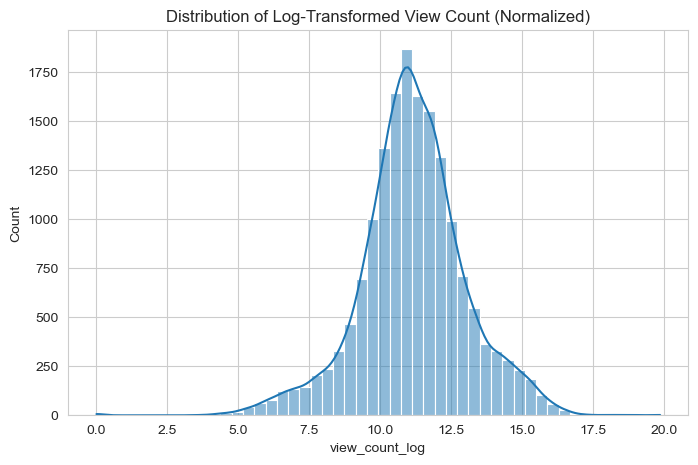

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

sns.set_style('whitegrid')

print("Normalizing skewed data using Log Transformation...")

#apply log(x+1) to our skewed columns.
#created NEW columns for this, keeping the originals.
df_processed['view_count_log'] = np.log1p(df_processed['view_count'])
df_processed['subscriber_count_log'] = np.log1p(df_processed['subscriber_count'])
df_processed['like_count_log'] = np.log1p(df_processed['like_count'])
df_processed['comment_count_log'] = np.log1p(df_processed['comment_count'])

#drop the original raw columns
df_processed = df_processed.drop(columns=['view_count', 'like_count', 'comment_count', 'subscriber_count'])

print("Log transformation complete and original columns dropped.")

# Let's chart the 'view_count_log' to see the difference.
plt.figure(figsize=(8, 5))
sns.histplot(df_processed['view_count_log'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed View Count (Normalized)')
plt.show()

### Encode Categorical Data

In [98]:
# 'channel_name' (text) into numbers for the model.

print(f"Found {df_processed['channel_name'].nunique()} unique channels to encode.")

#encode the 'channel_name'
df_processed = pd.get_dummies(df_processed, columns=['channel_name'], drop_first=True)

print("Categorical data ('channel_name') has been encoded.")
df_processed.head()

Found 17 unique channels to encode.
Categorical data ('channel_name') has been encoded.


,official_engagement_rate,total_posts,account_age_years,post_frequency_per_year,view_count_log,subscriber_count_log,like_count_log,comment_count_log,channel_name_CallMeShazzam TECH,channel_name_GADGETS ONE MALAYALAM TECH TIPS,...,channel_name_Mallu Discovery TV,channel_name_Mallu Tech,channel_name_Mr Perfect Tech,channel_name_PrathapGTech,channel_name_Ratheesh R Menon,channel_name_Rickyrodger,channel_name_Sarath'S Neon Tech,channel_name_Tec Tok by Hareesh,channel_name_Tech 4 Malayalam,channel_name_Tech Frame Malayalam
0,0.000874,699,9.0,77.666667,12.498675,16.432906,9.364348,5.723585,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.001055,699,9.0,77.666667,12.670696,16.432906,9.559799,5.605802,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.002174,699,9.0,77.666667,13.933958,16.432906,10.257870,7.150701,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.001039,699,9.0,77.666667,13.274413,16.432906,9.539428,5.834811,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.001832,699,9.0,77.666667,13.729160,16.432906,10.108304,6.313548,False,False,...,False,False,False,False,False,False,False,False,False,False


In [99]:
pip install xgboost

#### EDA (Correlation Heatmap)

Generating Correlation Heatmap...


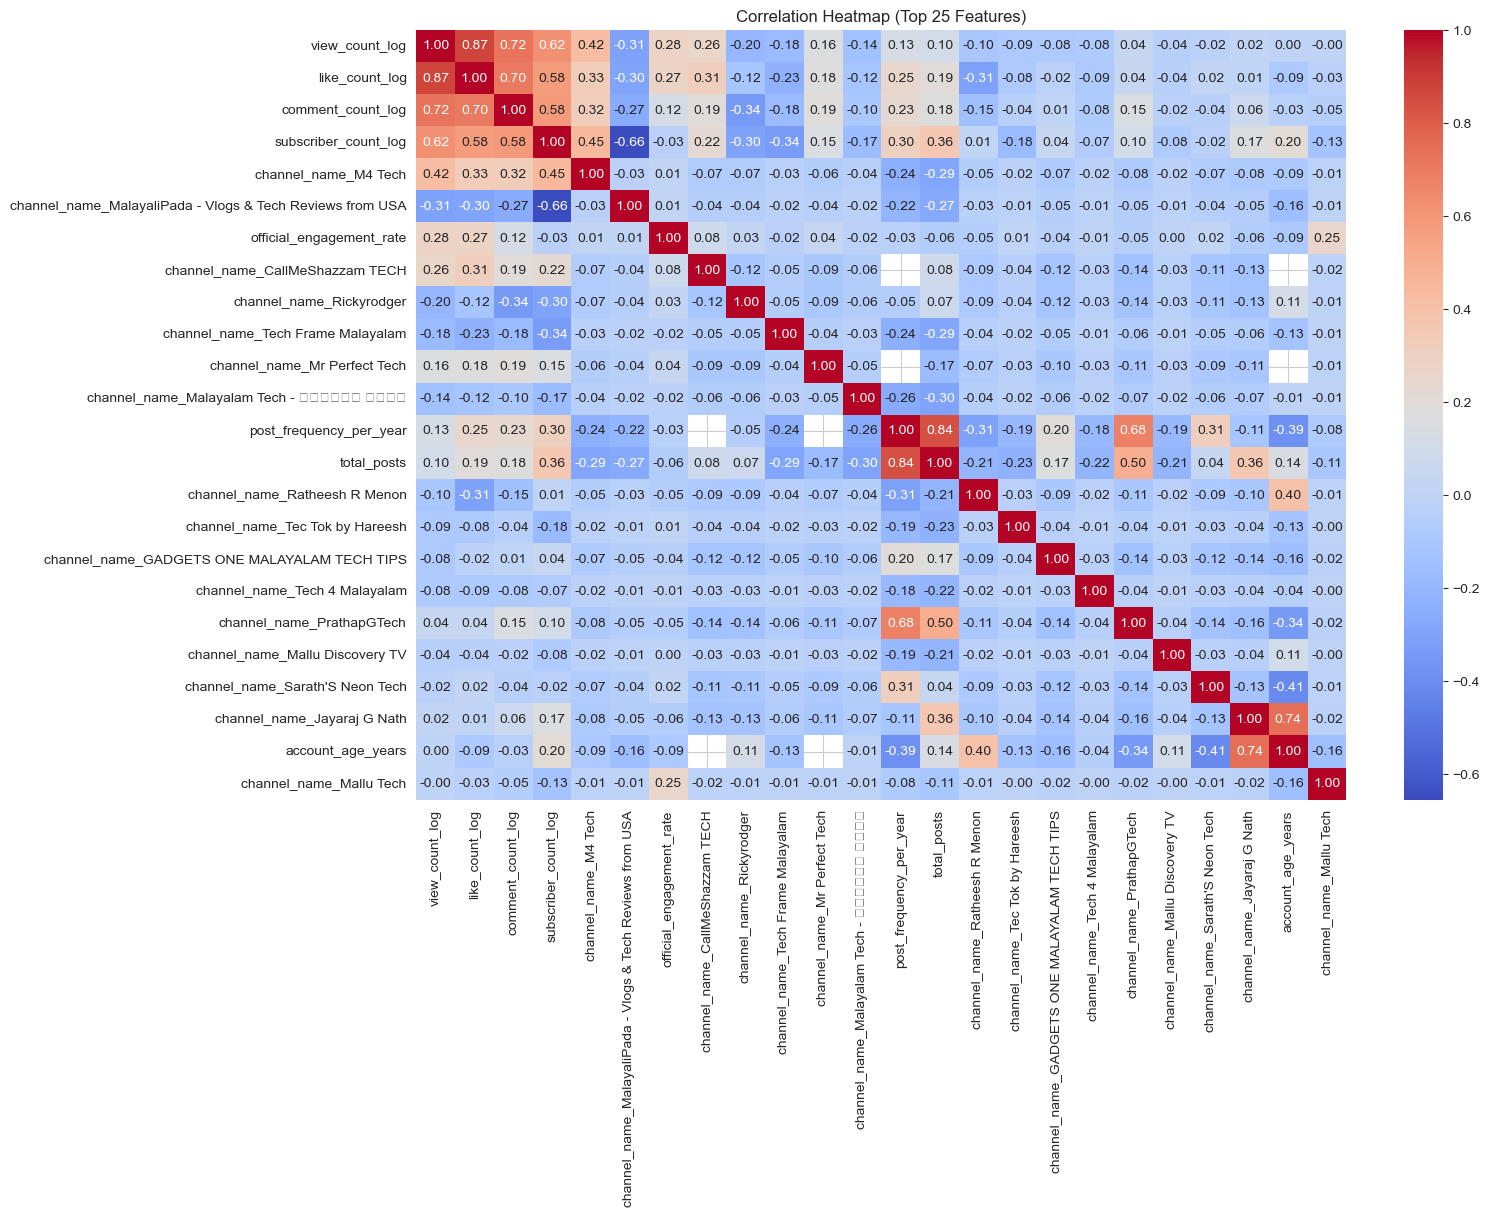

In [101]:
print("Generating Correlation Heatmap...")
plt.figure(figsize=(15, 10))

#the top 25 correlating features to keep the map readable
top_corr_features = df_processed.corr()['view_count_log'].abs().nlargest(25).index
correlation_matrix = df_processed[top_corr_features].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Top 25 Features)')
plt.show()

#### EDA (Feature Importance)

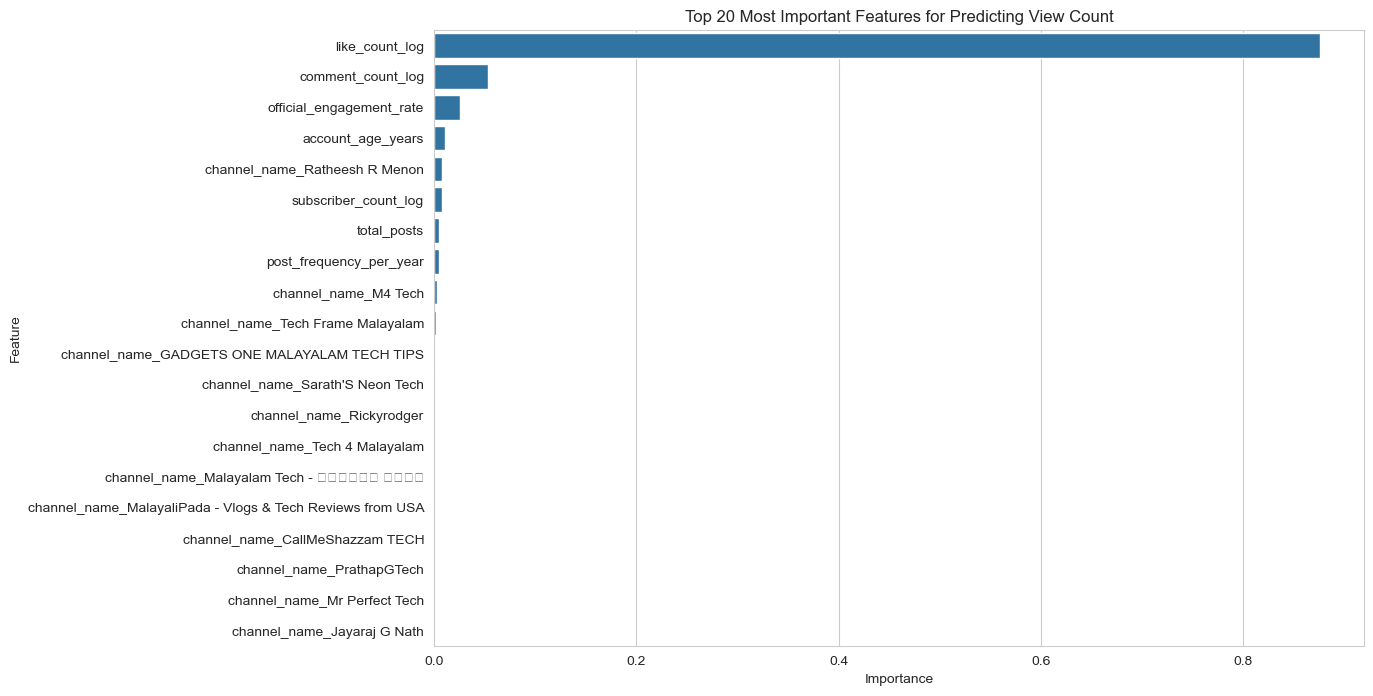

In [103]:
#Define our features (X) and our target (y)
from sklearn.model_selection import train_test_split

y = df_processed['view_count_log']
X = df_processed.drop(columns=['view_count_log'])

# Use a 10% sample of the data to make this run fast
X_sample, _, y_sample, _ = train_test_split(X, y, test_size=0.9, random_state=42)

#  Train a simple model
model = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
model.fit(X_sample, y_sample)

# Get and plot the Top 20 features
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
top_20_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_20_features)
plt.title('Top 20 Most Important Features for Predicting View Count')
plt.show()

##### Save the Preprocessed Dataset

In [105]:
output_filename = 'preprocessed_youtube_data.csv'
df_processed.to_csv(output_filename, index=False)

print(f"SUCCESS! Your final preprocessed dataset has been saved as '{output_filename}'")

SUCCESS! Your final preprocessed dataset has been saved as 'preprocessed_youtube_data.csv'
